In [ ]:
import tensorflow as tf
print(tf.__version__)

2.18.0


Importante: O exemplo GIANTSTEPS3519546.LOFI não pode ser utilizado. Tempo mais curto que a janela.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import shutil
#shutil.copy2("/content/drive/MyDrive/utilities.py", "/content/utilities.py")
#shutil.copy2("/content/drive/MyDrive/ConvNet3DSpecShanMorl.py", "/content/ConvNet3DSpecShanMorl.py")
#shutil.copy2("/content/drive/MyDrive/config.py", "/content/config.py")

'/content/config.py'

In [2]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adagrad
from tensorflow.keras.utils import to_categorical
from tensorflow.data import AUTOTUNE
import matplotlib.pyplot as plt
import tensorflow as tf
import argparse
import os
import numpy as np
import pandas as pd
import math
from tensorflow import keras
from sklearn.preprocessing import MultiLabelBinarizer
from IPython.display import Audio, clear_output, display
from glob import glob
import random

from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras import layers, models


In [3]:
BS = 32 #batch size

base_model = EfficientNetB0(input_shape=(300, 300, 3), include_top=False, weights='imagenet')

x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.3)(x)
output = layers.Dense(10, activation='softmax')(x)

model = models.Model(inputs=base_model.input, outputs=output)

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 300, 300,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 300, 300,  │          0 │ input_layer[0][0] │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 300, 300,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 300, 300,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 301, 301,  │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 150, 150,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 150, 150,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 150, 150,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 150, 150,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 150, 150,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 150, 150,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 150, 150,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 150, 150,  │        512 │ block1a_se_excit

 Total params: 4,214,829 (16.08 MB)

 Trainable params: 4,172,806 (15.92 MB)

 Non-trainable params: 42,023 (164.16 KB)

# k=1

In [4]:
import zipfile

zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Musical Genre Classification/Database/genre_scal_mel_kfold/treinamento1.zip", 'r')
zip_ref.extractall("/content")
zip_ref.close()

### Tensors Definitions

In [5]:
TRAIN_DATASET = os.path.join("/content", "training1")
VAL_DATASET = os.path.join("/content", "validation1")
#TEST_DATASET = os.path.join("/content", "teste1")
#METRONOMOS_DATASET = os.path.join("/content/drive/MyDrive/Database", "metronomos_review")

classes = os.listdir(VAL_DATASET) #10 classes
classes = sorted(classes)


def make_dataset(path, batch_size):
    def parse_image(filename):
        image = tf.io.read_file(filename)
        image = tf.image.decode_jpeg(image, channels=3)
        image = tf.image.resize(image, (300, 300))  # resize para modelos pré-treinados
        image = preprocess_input(image)  # 👈 importante
        return image

    def configure_for_performance(ds):
        ds = ds.shuffle(buffer_size=1000)
        ds = ds.batch(batch_size)
        ds = ds.repeat()
        ds = ds.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
        return ds

    class_names = sorted(os.listdir(path))  # Agora local
    filenames = glob(path + '/*/*')
    random.shuffle(filenames)
    labels = [class_names.index(name.split('/')[-2]) for name in filenames]

    filenames_ds = tf.data.Dataset.from_tensor_slices(filenames)
    images_ds = filenames_ds.map(parse_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    labels_ds = tf.data.Dataset.from_tensor_slices(labels)
    ds = tf.data.Dataset.zip((images_ds, labels_ds))
    ds = configure_for_performance(ds)

    return ds, class_names, images_ds, labels_ds

In [6]:
def make_dataset_predict(path, batch_size):
    def parse_image(filename):
        image = tf.io.read_file(filename)
        image = tf.image.decode_jpeg(image, channels=3)
        image = tf.image.resize(image, (300, 300))  # resize para modelos pré-treinados
        image = preprocess_input(image)  # 👈 importante
        return image

    def configure_for_performance(ds):
        #ds = ds.shuffle(buffer_size=1000)
        ds = ds.batch(batch_size)
        #ds = ds.repeat()
        ds = ds.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
        return ds

    class_names = sorted(os.listdir(path))  # Agora local
    filenames = glob(path + '/*/*')
    random.shuffle(filenames)
    labels = [class_names.index(name.split('/')[-2]) for name in filenames]

    filenames_ds = tf.data.Dataset.from_tensor_slices(filenames)
    images_ds = filenames_ds.map(parse_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    labels_ds = tf.data.Dataset.from_tensor_slices(labels)
    ds = tf.data.Dataset.zip((images_ds, labels_ds))
    ds = configure_for_performance(ds)

    return ds, class_names, images_ds, labels_ds

In [7]:
trainDS, classes_t, images_train, labels_train = make_dataset(TRAIN_DATASET, BS) #labels com valores 0 a 234
validationDS, classes_v, images_validation, labels_validation = make_dataset_predict(VAL_DATASET, BS) #labels com valores 0 a 234
#testDS, classes_te, images_test, labels_test = make_dataset(TEST_DATASET, BS)
print(trainDS)
print(validationDS)
#print(testDS)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [8]:
def make_dataset_augmentation(path, batch_size):
    def parse_image_with_stretch_tf(filename, label):
        image = tf.io.read_file(filename)
        image = tf.image.decode_jpeg(image, channels=3)

        # Stretch horizontal
        stretch_factors = tf.constant([1, 1.1, 1.2, 1.3], dtype=tf.float32)
        idx = tf.random.uniform([], minval=0, maxval=3, dtype=tf.int32)
        stretch = stretch_factors[idx]

        height = tf.shape(image)[0]
        width = tf.cast(tf.shape(image)[1], tf.float32)
        new_width = tf.cast(width * stretch, tf.int32)

        image = tf.image.resize(image, size=[height, new_width])
        image = tf.image.resize_with_crop_or_pad(image, 300, 300)
        image = preprocess_input(image)  # 👈 importante

        # Define forma estática para o grafo entender
        image.set_shape([300, 300, 3])
        return image, label

    def configure_for_performance(ds):
        ds = ds.shuffle(buffer_size=1000)
        ds = ds.batch(batch_size)
        ds = ds.repeat()
        ds = ds.prefetch(tf.data.AUTOTUNE)
        return ds

    # Carrega nomes e rótulos
    class_names = sorted(os.listdir(path))
    filenames = glob(path + '/*/*')
    random.shuffle(filenames)
    labels = [class_names.index(name.split('/')[-2]) for name in filenames]

    filenames_ds = tf.data.Dataset.from_tensor_slices(filenames)
    labels_ds = tf.data.Dataset.from_tensor_slices(labels)

    # Unifica imagens e rótulos ANTES do map
    ds = tf.data.Dataset.zip((filenames_ds, labels_ds))
    ds = ds.map(parse_image_with_stretch_tf, num_parallel_calls=tf.data.AUTOTUNE)
    ds = configure_for_performance(ds)

    return ds, class_names

In [9]:
trainDS_aug, classes_t_aug = make_dataset_augmentation(TRAIN_DATASET, BS) #labels com valores 0 a 234
print(trainDS_aug)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [10]:
print(classes_t)
print(classes_t_aug)
print(classes)

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


In [11]:
list_images_train = list(images_train.as_numpy_iterator())

In [12]:
list_images_validation = list(images_validation.as_numpy_iterator())

In [ ]:
#list_images_train_aug = list(images_train_aug.as_numpy_iterator())

In [ ]:
#list_images_test = list(images_test.as_numpy_iterator())

In [13]:
list_labels_train = list(labels_train.as_numpy_iterator())
labels_train_true = []
for i in list_labels_train:
       labels_train_true.append(classes[i])
#labels_train_true = np.array(labels_train_true, int) #labels de 23 a 257

list_labels_validation = list(labels_validation.as_numpy_iterator())
labels_validation_true = []
for i in list_labels_validation:
       labels_validation_true.append(classes[i])
#labels_validation_true = np.array(labels_validation_true, int)  #labels de 23 a 257

#list_labels_test= list(labels_test.as_numpy_iterator())
#labels_test_true = []
#for i in list_labels_test:
#       labels_test_true.append(classes[i])
#labels_test_true = np.array(labels_test_true, int)  #labels de 23 a 257

In [14]:
images_train_ds = np.array(list_images_train)
print(images_train_ds.shape)
images_validation_ds = np.array(list_images_validation)
print(images_validation_ds.shape)
#images_test_ds = np.array(list_images_test)
print(len(labels_train_true))
print(len(labels_validation_true))
#print(labels_test_true.shape)
print(trainDS_aug)
print(trainDS)
print(validationDS)
#print(testDS)

(800, 300, 300, 3)
(200, 300, 300, 3)
800
200
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [15]:
print(images_train_ds[1].shape)

(300, 300, 3)


In [ ]:
#print(list_images_train_aug[1].shape)

In [16]:
num_images_predict = len(glob(TRAIN_DATASET + '/*/*'))
num_images_val = len(glob(VAL_DATASET + '/*/*'))
steps_per_epoch_predict =math.ceil(num_images_predict/BS)
validation_steps = math.ceil(num_images_val/BS)

#Criando o multilabel binarizer:

mlb = MultiLabelBinarizer()
dicionario = mlb.fit_transform([classes])

In [17]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)
opt = keras.optimizers.Adam(learning_rate=lr_schedule)
optimizer = keras.optimizers.Adam(learning_rate=1e-4)


base_model.trainable = True
for layer in base_model.layers[:-80]:
    layer.trainable = False

model.compile(loss ='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

### Model.fit

In [18]:
%%time
history = model.fit(trainDS_aug, validation_data=validationDS, epochs=100, batch_size=BS, steps_per_epoch=steps_per_epoch_predict,  validation_steps=validation_steps ,verbose=1)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 54s 538ms/step - accuracy: 0.1929 - loss: 2.2403 - val_accuracy: 0.1050 - val_loss: 2.2441
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.4376 - loss: 1.8208 - val_accuracy: 0.3600 - val_loss: 2.0560
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.5752 - loss: 1.4774 - val_accuracy: 0.4650 - val_loss: 1.8047
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.6750 - loss: 1.1806 - val_accuracy: 0.5000 - val_loss: 1.5666
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.6895 - loss: 0.9715 - val_accuracy: 0.5600 - val_loss: 1.3307
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.7602 - loss: 0.8161 - val_accuracy: 0.5850 - val_loss: 1.1857
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.8189 - loss: 0.6524 - val_accuracy: 0.6300 - val_loss: 1.0352
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.8403 - loss: 0.5545 - val_acc

In [19]:



# Fase 2: Fine-tuning (descongelar parte da base)
base_model.trainable = True

# Congela camadas iniciais e libera só as últimas 20, por exemplo:
#for layer in base_model.layers[:-50]:
#    layer.trainable = False

model.optimizer.learning_rate.assign(1e-5)

#keras.backend.set_value(model.optimizer.learning_rate, 1e-5)

#from tensorflow.keras.optimizers import Adam

#model.compile(optimizer=Adam(1e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Compila com taxa de aprendizado reduzida
#model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_finetune = model.fit(trainDS_aug, validation_data=validationDS, epochs=20, batch_size=BS, steps_per_epoch=steps_per_epoch_predict,  validation_steps=validation_steps ,verbose=1)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.9958 - loss: 0.0114 - val_accuracy: 0.7650 - val_loss: 1.4425
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.9945 - loss: 0.0155 - val_accuracy: 0.7700 - val_loss: 1.4237
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.9924 - loss: 0.0171 - val_accuracy: 0.7700 - val_loss: 1.4097
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.9937 - loss: 0.0145 - val_accuracy: 0.7700 - val_loss: 1.3986
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.9941 - loss: 0.0155 - val_accuracy: 0.7700 - val_loss: 1.3910
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.9990 - loss: 0.0077 - val_accuracy: 0.7700 - val_loss: 1.3891
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.9945 - loss: 0.0190 - val_accuracy: 0.7700 - val_loss: 1.3773
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.9918 - loss: 0.0167 - val_accuracy: 0.

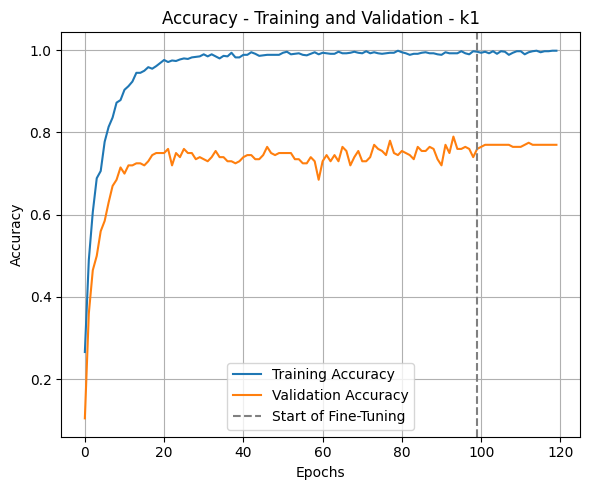

In [20]:
acc_phase1 = history.history['accuracy']
val_acc_phase1 = history.history['val_accuracy']

acc_phase2 = history_finetune.history['accuracy']
val_acc_phase2 = history_finetune.history['val_accuracy']

acc_total = acc_phase1 + acc_phase2
val_acc_total = val_acc_phase1 + val_acc_phase2
epochs_total = range(len(acc_total))

plt.figure(figsize=(6,5))
plt.plot(epochs_total, acc_total, label='Training Accuracy')
plt.plot(epochs_total, val_acc_total, label='Validation Accuracy')

# Mark the transition between phases
plt.axvline(x=len(acc_phase1)-1, color='gray', linestyle='--', label='Start of Fine-Tuning')

plt.title('Accuracy - Training and Validation - k1')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Musical Genre Classification/Resultados/efficientnetb0_genre_scal_mel_kfold/accuracy_genre_mel_k1.pdf')
plt.show()

In [21]:
np.save('/content/drive/MyDrive/Musical Genre Classification/Resultados/efficientnetb0_genre_scal_mel_kfold/acc_total_k1.npy', acc_total)
np.save('/content/drive/MyDrive/Musical Genre Classification/Resultados/efficientnetb0_genre_scal_mel_kfold/val_acc_total_k1.npy', val_acc_total)

In [22]:
model.save('/content/drive/MyDrive/Musical Genre Classification/Resultados/efficientnetb0_genre_scal_mel_kfold/model_k1.keras')

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/Musical Genre Classification/Resultados/efficientnetb0_genre_scal_mel_kfold/model_k1.keras')

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 112 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [23]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

testDS_eval = validationDS.unbatch().batch(32)  # ou validationDS

y_true = []
y_pred = []

for images, labels in testDS_eval:
    preds = model.predict(images)
    y_pred.extend(np.argmax(preds, axis=1))
    y_true.extend(labels.numpy())

cm = confusion_matrix(y_true, y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


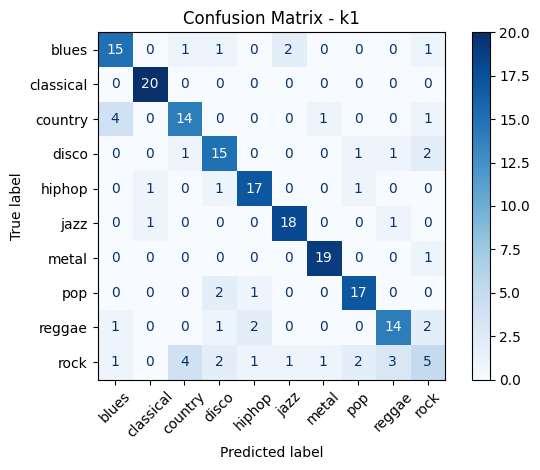

In [24]:
# Supondo que você tem class_names do seu dataset
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix - k1")
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Musical Genre Classification/Resultados/efficientnetb0_genre_scal_mel_kfold/confusionmatrix_genre_mel_k1.pdf')
plt.show()

In [25]:
from google.colab import runtime
runtime.unassign()

# k=2

In [4]:
import zipfile

zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Musical Genre Classification/Database/genre_scal_mel_kfold/treinamento2.zip", 'r')
zip_ref.extractall("/content")
zip_ref.close()

### Tensors Definitions

In [5]:
TRAIN_DATASET = os.path.join("/content", "training2")
VAL_DATASET = os.path.join("/content", "validation2")
#TEST_DATASET = os.path.join("/content", "teste1")
#METRONOMOS_DATASET = os.path.join("/content/drive/MyDrive/Database", "metronomos_review")

classes = os.listdir(VAL_DATASET) #10 classes
classes = sorted(classes)


def make_dataset(path, batch_size):
    def parse_image(filename):
        image = tf.io.read_file(filename)
        image = tf.image.decode_jpeg(image, channels=3)
        image = tf.image.resize(image, (300, 300))  # resize para modelos pré-treinados
        image = preprocess_input(image)  # 👈 importante
        return image

    def configure_for_performance(ds):
        ds = ds.shuffle(buffer_size=1000)
        ds = ds.batch(batch_size)
        ds = ds.repeat()
        ds = ds.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
        return ds

    class_names = sorted(os.listdir(path))  # Agora local
    filenames = glob(path + '/*/*')
    random.shuffle(filenames)
    labels = [class_names.index(name.split('/')[-2]) for name in filenames]

    filenames_ds = tf.data.Dataset.from_tensor_slices(filenames)
    images_ds = filenames_ds.map(parse_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    labels_ds = tf.data.Dataset.from_tensor_slices(labels)
    ds = tf.data.Dataset.zip((images_ds, labels_ds))
    ds = configure_for_performance(ds)

    return ds, class_names, images_ds, labels_ds

In [6]:
def make_dataset_predict(path, batch_size):
    def parse_image(filename):
        image = tf.io.read_file(filename)
        image = tf.image.decode_jpeg(image, channels=3)
        image = tf.image.resize(image, (300, 300))  # resize para modelos pré-treinados
        image = preprocess_input(image)  # 👈 importante
        return image

    def configure_for_performance(ds):
        #ds = ds.shuffle(buffer_size=1000)
        ds = ds.batch(batch_size)
        #ds = ds.repeat()
        ds = ds.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
        return ds

    class_names = sorted(os.listdir(path))  # Agora local
    filenames = glob(path + '/*/*')
    random.shuffle(filenames)
    labels = [class_names.index(name.split('/')[-2]) for name in filenames]

    filenames_ds = tf.data.Dataset.from_tensor_slices(filenames)
    images_ds = filenames_ds.map(parse_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    labels_ds = tf.data.Dataset.from_tensor_slices(labels)
    ds = tf.data.Dataset.zip((images_ds, labels_ds))
    ds = configure_for_performance(ds)

    return ds, class_names, images_ds, labels_ds

In [7]:
trainDS, classes_t, images_train, labels_train = make_dataset(TRAIN_DATASET, BS) #labels com valores 0 a 234
validationDS, classes_v, images_validation, labels_validation = make_dataset_predict(VAL_DATASET, BS) #labels com valores 0 a 234
#testDS, classes_te, images_test, labels_test = make_dataset(TEST_DATASET, BS)
print(trainDS)
print(validationDS)
#print(testDS)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [8]:
def make_dataset_augmentation(path, batch_size):
    def parse_image_with_stretch_tf(filename, label):
        image = tf.io.read_file(filename)
        image = tf.image.decode_jpeg(image, channels=3)

        # Stretch horizontal
        stretch_factors = tf.constant([1, 1.1, 1.2, 1.3], dtype=tf.float32)
        idx = tf.random.uniform([], minval=0, maxval=3, dtype=tf.int32)
        stretch = stretch_factors[idx]

        height = tf.shape(image)[0]
        width = tf.cast(tf.shape(image)[1], tf.float32)
        new_width = tf.cast(width * stretch, tf.int32)

        image = tf.image.resize(image, size=[height, new_width])
        image = tf.image.resize_with_crop_or_pad(image, 300, 300)
        image = preprocess_input(image)  # 👈 importante

        # Define forma estática para o grafo entender
        image.set_shape([300, 300, 3])
        return image, label

    def configure_for_performance(ds):
        ds = ds.shuffle(buffer_size=1000)
        ds = ds.batch(batch_size)
        ds = ds.repeat()
        ds = ds.prefetch(tf.data.AUTOTUNE)
        return ds

    # Carrega nomes e rótulos
    class_names = sorted(os.listdir(path))
    filenames = glob(path + '/*/*')
    random.shuffle(filenames)
    labels = [class_names.index(name.split('/')[-2]) for name in filenames]

    filenames_ds = tf.data.Dataset.from_tensor_slices(filenames)
    labels_ds = tf.data.Dataset.from_tensor_slices(labels)

    # Unifica imagens e rótulos ANTES do map
    ds = tf.data.Dataset.zip((filenames_ds, labels_ds))
    ds = ds.map(parse_image_with_stretch_tf, num_parallel_calls=tf.data.AUTOTUNE)
    ds = configure_for_performance(ds)

    return ds, class_names

In [9]:
trainDS_aug, classes_t_aug = make_dataset_augmentation(TRAIN_DATASET, BS) #labels com valores 0 a 234
print(trainDS_aug)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [10]:
print(classes_t)
print(classes_t_aug)
print(classes)

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


In [11]:
list_images_train = list(images_train.as_numpy_iterator())

In [12]:
list_images_validation = list(images_validation.as_numpy_iterator())

In [ ]:
#list_images_train_aug = list(images_train_aug.as_numpy_iterator())

In [ ]:
#list_images_test = list(images_test.as_numpy_iterator())

In [13]:
list_labels_train = list(labels_train.as_numpy_iterator())
labels_train_true = []
for i in list_labels_train:
       labels_train_true.append(classes[i])
#labels_train_true = np.array(labels_train_true, int) #labels de 23 a 257

list_labels_validation = list(labels_validation.as_numpy_iterator())
labels_validation_true = []
for i in list_labels_validation:
       labels_validation_true.append(classes[i])
#labels_validation_true = np.array(labels_validation_true, int)  #labels de 23 a 257

#list_labels_test= list(labels_test.as_numpy_iterator())
#labels_test_true = []
#for i in list_labels_test:
#       labels_test_true.append(classes[i])
#labels_test_true = np.array(labels_test_true, int)  #labels de 23 a 257

In [14]:
images_train_ds = np.array(list_images_train)
print(images_train_ds.shape)
images_validation_ds = np.array(list_images_validation)
print(images_validation_ds.shape)
#images_test_ds = np.array(list_images_test)
print(len(labels_train_true))
print(len(labels_validation_true))
#print(labels_test_true.shape)
print(trainDS_aug)
print(trainDS)
print(validationDS)
#print(testDS)

(800, 300, 300, 3)
(200, 300, 300, 3)
800
200
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [15]:
print(images_train_ds[1].shape)

(300, 300, 3)


In [ ]:
#print(list_images_train_aug[1].shape)

In [16]:
num_images_predict = len(glob(TRAIN_DATASET + '/*/*'))
num_images_val = len(glob(VAL_DATASET + '/*/*'))
steps_per_epoch_predict =math.ceil(num_images_predict/BS)
validation_steps = math.ceil(num_images_val/BS)

#Criando o multilabel binarizer:

mlb = MultiLabelBinarizer()
dicionario = mlb.fit_transform([classes])

In [17]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)
opt = keras.optimizers.Adam(learning_rate=lr_schedule)
optimizer = keras.optimizers.Adam(learning_rate=1e-4)


base_model.trainable = True
for layer in base_model.layers[:-80]:
    layer.trainable = False

model.compile(loss ='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

### Model.fit

In [18]:
%%time
history = model.fit(trainDS_aug, validation_data=validationDS, epochs=100, batch_size=BS, steps_per_epoch=steps_per_epoch_predict,  validation_steps=validation_steps ,verbose=1)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 54s 545ms/step - accuracy: 0.1940 - loss: 2.2659 - val_accuracy: 0.1150 - val_loss: 2.3201
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.4933 - loss: 1.8296 - val_accuracy: 0.2200 - val_loss: 2.1717
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.5634 - loss: 1.5156 - val_accuracy: 0.3250 - val_loss: 1.9868
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.6560 - loss: 1.1890 - val_accuracy: 0.3800 - val_loss: 1.7102
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.7092 - loss: 0.9968 - val_accuracy: 0.5200 - val_loss: 1.4665
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.7476 - loss: 0.8548 - val_accuracy: 0.6000 - val_loss: 1.1985
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.8076 - loss: 0.6781 - val_accuracy: 0.6300 - val_loss: 1.0864
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.8168 - loss: 0.6142 - val_acc

In [19]:



# Fase 2: Fine-tuning (descongelar parte da base)
base_model.trainable = True

# Congela camadas iniciais e libera só as últimas 20, por exemplo:
#for layer in base_model.layers[:-50]:
#    layer.trainable = False

model.optimizer.learning_rate.assign(1e-5)

#keras.backend.set_value(model.optimizer.learning_rate, 1e-5)

#from tensorflow.keras.optimizers import Adam

#model.compile(optimizer=Adam(1e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Compila com taxa de aprendizado reduzida
#model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_finetune = model.fit(trainDS_aug, validation_data=validationDS, epochs=20, batch_size=BS, steps_per_epoch=steps_per_epoch_predict,  validation_steps=validation_steps ,verbose=1)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.9973 - loss: 0.0071 - val_accuracy: 0.7700 - val_loss: 1.0591
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.9975 - loss: 0.0104 - val_accuracy: 0.7750 - val_loss: 1.0483
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.9976 - loss: 0.0079 - val_accuracy: 0.7850 - val_loss: 1.0378
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.9927 - loss: 0.0195 - val_accuracy: 0.7850 - val_loss: 1.0219
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.9974 - loss: 0.0123 - val_accuracy: 0.7900 - val_loss: 1.0171
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 1.0000 - loss: 0.0078 - val_accuracy: 0.7950 - val_loss: 1.0128
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.9966 - loss: 0.0098 - val_accuracy: 0.7950 - val_loss: 1.0136
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - accuracy: 0.9977 - loss: 0.0167 - val_accuracy: 0.

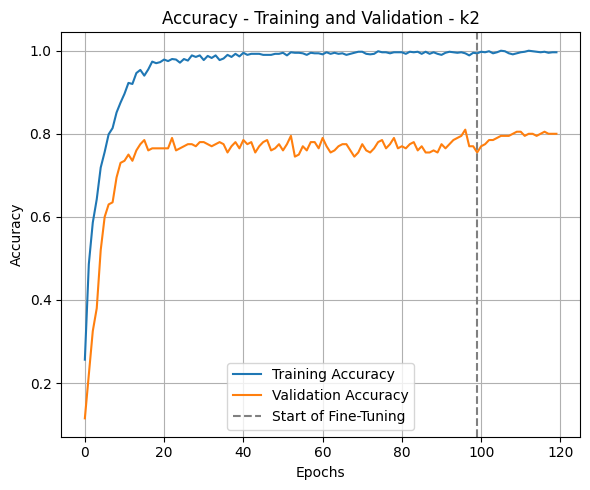

In [20]:
acc_phase1 = history.history['accuracy']
val_acc_phase1 = history.history['val_accuracy']

acc_phase2 = history_finetune.history['accuracy']
val_acc_phase2 = history_finetune.history['val_accuracy']

acc_total = acc_phase1 + acc_phase2
val_acc_total = val_acc_phase1 + val_acc_phase2
epochs_total = range(len(acc_total))

plt.figure(figsize=(6,5))
plt.plot(epochs_total, acc_total, label='Training Accuracy')
plt.plot(epochs_total, val_acc_total, label='Validation Accuracy')

# Mark the transition between phases
plt.axvline(x=len(acc_phase1)-1, color='gray', linestyle='--', label='Start of Fine-Tuning')

plt.title('Accuracy - Training and Validation - k2')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Musical Genre Classification/Resultados/efficientnetb0_genre_scal_mel_kfold/accuracy_genre_mel_k2.pdf')
plt.show()

In [21]:
np.save('/content/drive/MyDrive/Musical Genre Classification/Resultados/efficientnetb0_genre_scal_mel_kfold/acc_total_k2.npy', acc_total)
np.save('/content/drive/MyDrive/Musical Genre Classification/Resultados/efficientnetb0_genre_scal_mel_kfold/val_acc_total_k2.npy', val_acc_total)

In [22]:
model.save('/content/drive/MyDrive/Musical Genre Classification/Resultados/efficientnetb0_genre_scal_mel_kfold/model_k2.keras')

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/Musical Genre Classification/Resultados/efficientnetb0_genre_scal_mel_kfold/model_k2.keras')

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 112 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [23]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

testDS_eval = validationDS.unbatch().batch(32)  # ou validationDS

y_true = []
y_pred = []

for images, labels in testDS_eval:
    preds = model.predict(images)
    y_pred.extend(np.argmax(preds, axis=1))
    y_true.extend(labels.numpy())

cm = confusion_matrix(y_true, y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


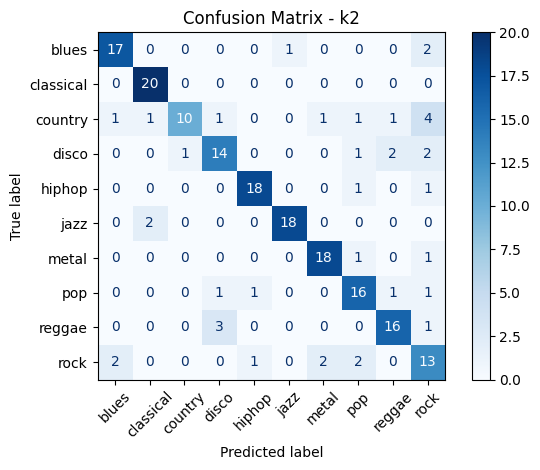

In [24]:
# Supondo que você tem class_names do seu dataset
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix - k2")
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Musical Genre Classification/Resultados/efficientnetb0_genre_scal_mel_kfold/confusionmatrix_genre_mel_k2.pdf')
plt.show()

In [25]:
from google.colab import runtime
runtime.unassign()

# k=3

In [4]:
import zipfile

zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Musical Genre Classification/Database/genre_scal_mel_kfold/treinamento3.zip", 'r')
zip_ref.extractall("/content")
zip_ref.close()

### Tensors Definitions

In [5]:
TRAIN_DATASET = os.path.join("/content", "training3")
VAL_DATASET = os.path.join("/content", "validation3")
#TEST_DATASET = os.path.join("/content", "teste1")
#METRONOMOS_DATASET = os.path.join("/content/drive/MyDrive/Database", "metronomos_review")

classes = os.listdir(VAL_DATASET) #10 classes
classes = sorted(classes)


def make_dataset(path, batch_size):
    def parse_image(filename):
        image = tf.io.read_file(filename)
        image = tf.image.decode_jpeg(image, channels=3)
        image = tf.image.resize(image, (300, 300))  # resize para modelos pré-treinados
        image = preprocess_input(image)  # 👈 importante
        return image

    def configure_for_performance(ds):
        ds = ds.shuffle(buffer_size=1000)
        ds = ds.batch(batch_size)
        ds = ds.repeat()
        ds = ds.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
        return ds

    class_names = sorted(os.listdir(path))  # Agora local
    filenames = glob(path + '/*/*')
    random.shuffle(filenames)
    labels = [class_names.index(name.split('/')[-2]) for name in filenames]

    filenames_ds = tf.data.Dataset.from_tensor_slices(filenames)
    images_ds = filenames_ds.map(parse_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    labels_ds = tf.data.Dataset.from_tensor_slices(labels)
    ds = tf.data.Dataset.zip((images_ds, labels_ds))
    ds = configure_for_performance(ds)

    return ds, class_names, images_ds, labels_ds

In [6]:
def make_dataset_predict(path, batch_size):
    def parse_image(filename):
        image = tf.io.read_file(filename)
        image = tf.image.decode_jpeg(image, channels=3)
        image = tf.image.resize(image, (300, 300))  # resize para modelos pré-treinados
        image = preprocess_input(image)  # 👈 importante
        return image

    def configure_for_performance(ds):
        #ds = ds.shuffle(buffer_size=1000)
        ds = ds.batch(batch_size)
        #ds = ds.repeat()
        ds = ds.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
        return ds

    class_names = sorted(os.listdir(path))  # Agora local
    filenames = glob(path + '/*/*')
    random.shuffle(filenames)
    labels = [class_names.index(name.split('/')[-2]) for name in filenames]

    filenames_ds = tf.data.Dataset.from_tensor_slices(filenames)
    images_ds = filenames_ds.map(parse_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    labels_ds = tf.data.Dataset.from_tensor_slices(labels)
    ds = tf.data.Dataset.zip((images_ds, labels_ds))
    ds = configure_for_performance(ds)

    return ds, class_names, images_ds, labels_ds

In [7]:
trainDS, classes_t, images_train, labels_train = make_dataset(TRAIN_DATASET, BS) #labels com valores 0 a 234
validationDS, classes_v, images_validation, labels_validation = make_dataset_predict(VAL_DATASET, BS) #labels com valores 0 a 234
#testDS, classes_te, images_test, labels_test = make_dataset(TEST_DATASET, BS)
print(trainDS)
print(validationDS)
#print(testDS)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [8]:
def make_dataset_augmentation(path, batch_size):
    def parse_image_with_stretch_tf(filename, label):
        image = tf.io.read_file(filename)
        image = tf.image.decode_jpeg(image, channels=3)

        # Stretch horizontal
        stretch_factors = tf.constant([1, 1.1, 1.2, 1.3], dtype=tf.float32)
        idx = tf.random.uniform([], minval=0, maxval=3, dtype=tf.int32)
        stretch = stretch_factors[idx]

        height = tf.shape(image)[0]
        width = tf.cast(tf.shape(image)[1], tf.float32)
        new_width = tf.cast(width * stretch, tf.int32)

        image = tf.image.resize(image, size=[height, new_width])
        image = tf.image.resize_with_crop_or_pad(image, 300, 300)
        image = preprocess_input(image)  # 👈 importante

        # Define forma estática para o grafo entender
        image.set_shape([300, 300, 3])
        return image, label

    def configure_for_performance(ds):
        ds = ds.shuffle(buffer_size=1000)
        ds = ds.batch(batch_size)
        ds = ds.repeat()
        ds = ds.prefetch(tf.data.AUTOTUNE)
        return ds

    # Carrega nomes e rótulos
    class_names = sorted(os.listdir(path))
    filenames = glob(path + '/*/*')
    random.shuffle(filenames)
    labels = [class_names.index(name.split('/')[-2]) for name in filenames]

    filenames_ds = tf.data.Dataset.from_tensor_slices(filenames)
    labels_ds = tf.data.Dataset.from_tensor_slices(labels)

    # Unifica imagens e rótulos ANTES do map
    ds = tf.data.Dataset.zip((filenames_ds, labels_ds))
    ds = ds.map(parse_image_with_stretch_tf, num_parallel_calls=tf.data.AUTOTUNE)
    ds = configure_for_performance(ds)

    return ds, class_names

In [9]:
trainDS_aug, classes_t_aug = make_dataset_augmentation(TRAIN_DATASET, BS) #labels com valores 0 a 234
print(trainDS_aug)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [10]:
print(classes_t)
print(classes_t_aug)
print(classes)

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


In [11]:
list_images_train = list(images_train.as_numpy_iterator())

In [12]:
list_images_validation = list(images_validation.as_numpy_iterator())

In [ ]:
#list_images_train_aug = list(images_train_aug.as_numpy_iterator())

In [ ]:
#list_images_test = list(images_test.as_numpy_iterator())

In [13]:
list_labels_train = list(labels_train.as_numpy_iterator())
labels_train_true = []
for i in list_labels_train:
       labels_train_true.append(classes[i])
#labels_train_true = np.array(labels_train_true, int) #labels de 23 a 257

list_labels_validation = list(labels_validation.as_numpy_iterator())
labels_validation_true = []
for i in list_labels_validation:
       labels_validation_true.append(classes[i])
#labels_validation_true = np.array(labels_validation_true, int)  #labels de 23 a 257

#list_labels_test= list(labels_test.as_numpy_iterator())
#labels_test_true = []
#for i in list_labels_test:
#       labels_test_true.append(classes[i])
#labels_test_true = np.array(labels_test_true, int)  #labels de 23 a 257

In [14]:
images_train_ds = np.array(list_images_train)
print(images_train_ds.shape)
images_validation_ds = np.array(list_images_validation)
print(images_validation_ds.shape)
#images_test_ds = np.array(list_images_test)
print(len(labels_train_true))
print(len(labels_validation_true))
#print(labels_test_true.shape)
print(trainDS_aug)
print(trainDS)
print(validationDS)
#print(testDS)

(800, 300, 300, 3)
(200, 300, 300, 3)
800
200
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [15]:
print(images_train_ds[1].shape)

(300, 300, 3)


In [ ]:
#print(list_images_train_aug[1].shape)

In [16]:
num_images_predict = len(glob(TRAIN_DATASET + '/*/*'))
num_images_val = len(glob(VAL_DATASET + '/*/*'))
steps_per_epoch_predict =math.ceil(num_images_predict/BS)
validation_steps = math.ceil(num_images_val/BS)

#Criando o multilabel binarizer:

mlb = MultiLabelBinarizer()
dicionario = mlb.fit_transform([classes])

In [17]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)
opt = keras.optimizers.Adam(learning_rate=lr_schedule)
optimizer = keras.optimizers.Adam(learning_rate=1e-4)


base_model.trainable = True
for layer in base_model.layers[:-80]:
    layer.trainable = False

model.compile(loss ='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

### Model.fit

In [18]:
%%time
history = model.fit(trainDS_aug, validation_data=validationDS, epochs=100, batch_size=BS, steps_per_epoch=steps_per_epoch_predict,  validation_steps=validation_steps ,verbose=1)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 54s 556ms/step - accuracy: 0.1369 - loss: 2.2736 - val_accuracy: 0.1050 - val_loss: 2.4133
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.4548 - loss: 1.8278 - val_accuracy: 0.1300 - val_loss: 2.2817
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.5742 - loss: 1.4695 - val_accuracy: 0.2500 - val_loss: 2.0578
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.6742 - loss: 1.1634 - val_accuracy: 0.4600 - val_loss: 1.7482
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.7430 - loss: 0.9994 - val_accuracy: 0.6250 - val_loss: 1.3861
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.7532 - loss: 0.8569 - val_accuracy: 0.6350 - val_loss: 1.1299
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.7736 - loss: 0.6989 - val_accuracy: 0.6950 - val_loss: 0.9731
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.8055 - loss: 0.6076 - val_acc

In [19]:



# Fase 2: Fine-tuning (descongelar parte da base)
base_model.trainable = True

# Congela camadas iniciais e libera só as últimas 20, por exemplo:
#for layer in base_model.layers[:-50]:
#    layer.trainable = False

model.optimizer.learning_rate.assign(1e-5)

#keras.backend.set_value(model.optimizer.learning_rate, 1e-5)

#from tensorflow.keras.optimizers import Adam

#model.compile(optimizer=Adam(1e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Compila com taxa de aprendizado reduzida
#model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_finetune = model.fit(trainDS_aug, validation_data=validationDS, epochs=20, batch_size=BS, steps_per_epoch=steps_per_epoch_predict,  validation_steps=validation_steps ,verbose=1)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - accuracy: 0.9977 - loss: 0.0097 - val_accuracy: 0.8050 - val_loss: 0.8262
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - accuracy: 0.9973 - loss: 0.0105 - val_accuracy: 0.8150 - val_loss: 0.8065
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step - accuracy: 0.9960 - loss: 0.0159 - val_accuracy: 0.8150 - val_loss: 0.7975
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - accuracy: 0.9837 - loss: 0.0322 - val_accuracy: 0.8150 - val_loss: 0.7896
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - accuracy: 0.9915 - loss: 0.0228 - val_accuracy: 0.8150 - val_loss: 0.7703
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - accuracy: 0.9941 - loss: 0.0261 - val_accuracy: 0.8200 - val_loss: 0.7649
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step - accuracy: 0.9938 - loss: 0.0149 - val_accuracy: 0.8250 - val_loss: 0.7723
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - accuracy: 0.9971 - loss: 0.0171 - val_accuracy: 0.

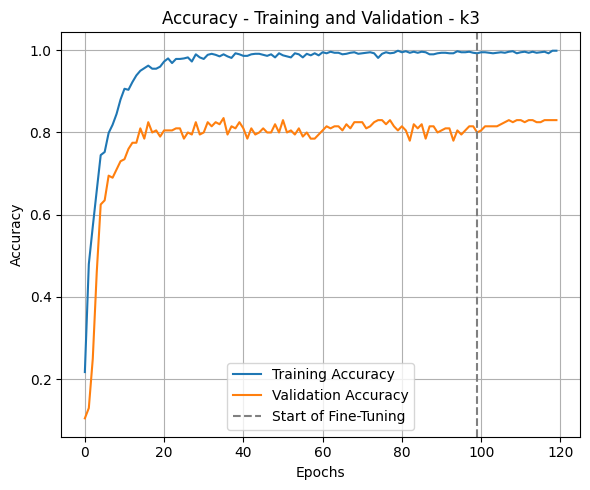

In [20]:
acc_phase1 = history.history['accuracy']
val_acc_phase1 = history.history['val_accuracy']

acc_phase2 = history_finetune.history['accuracy']
val_acc_phase2 = history_finetune.history['val_accuracy']

acc_total = acc_phase1 + acc_phase2
val_acc_total = val_acc_phase1 + val_acc_phase2
epochs_total = range(len(acc_total))

plt.figure(figsize=(6,5))
plt.plot(epochs_total, acc_total, label='Training Accuracy')
plt.plot(epochs_total, val_acc_total, label='Validation Accuracy')

# Mark the transition between phases
plt.axvline(x=len(acc_phase1)-1, color='gray', linestyle='--', label='Start of Fine-Tuning')

plt.title('Accuracy - Training and Validation - k3')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Musical Genre Classification/Resultados/efficientnetb0_genre_scal_mel_kfold/accuracy_genre_mel_k3.pdf')
plt.show()

In [21]:
np.save('/content/drive/MyDrive/Musical Genre Classification/Resultados/efficientnetb0_genre_scal_mel_kfold/acc_total_k3.npy', acc_total)
np.save('/content/drive/MyDrive/Musical Genre Classification/Resultados/efficientnetb0_genre_scal_mel_kfold/val_acc_total_k3.npy', val_acc_total)

In [22]:
model.save('/content/drive/MyDrive/Musical Genre Classification/Resultados/efficientnetb0_genre_scal_mel_kfold/model_k3.keras')

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/Musical Genre Classification/Resultados/efficientnetb0_genre_scal_mel_kfold/model_k3.keras')

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 112 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [23]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

testDS_eval = validationDS.unbatch().batch(32)  # ou validationDS

y_true = []
y_pred = []

for images, labels in testDS_eval:
    preds = model.predict(images)
    y_pred.extend(np.argmax(preds, axis=1))
    y_true.extend(labels.numpy())

cm = confusion_matrix(y_true, y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


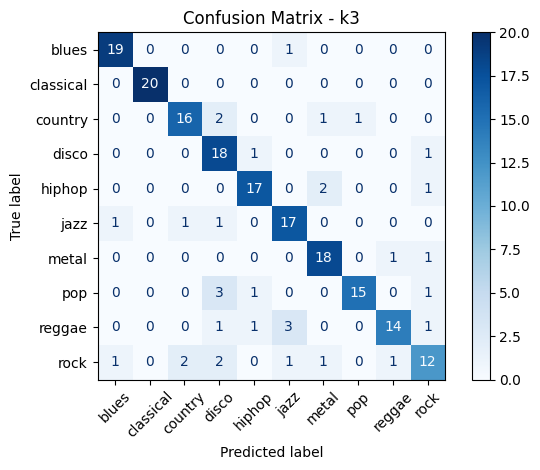

In [24]:
# Supondo que você tem class_names do seu dataset
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix - k3")
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Musical Genre Classification/Resultados/efficientnetb0_genre_scal_mel_kfold/confusionmatrix_genre_mel_k3.pdf')
plt.show()

In [25]:
from google.colab import runtime
runtime.unassign()

# k=4

In [4]:
import zipfile

zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Musical Genre Classification/Database/genre_scal_mel_kfold/treinamento4.zip", 'r')
zip_ref.extractall("/content")
zip_ref.close()

### Tensors Definitions

In [5]:
TRAIN_DATASET = os.path.join("/content", "training4")
VAL_DATASET = os.path.join("/content", "validation4")
#TEST_DATASET = os.path.join("/content", "teste1")
#METRONOMOS_DATASET = os.path.join("/content/drive/MyDrive/Database", "metronomos_review")

classes = os.listdir(VAL_DATASET) #10 classes
classes = sorted(classes)


def make_dataset(path, batch_size):
    def parse_image(filename):
        image = tf.io.read_file(filename)
        image = tf.image.decode_jpeg(image, channels=3)
        image = tf.image.resize(image, (300, 300))  # resize para modelos pré-treinados
        image = preprocess_input(image)  # 👈 importante
        return image

    def configure_for_performance(ds):
        ds = ds.shuffle(buffer_size=1000)
        ds = ds.batch(batch_size)
        ds = ds.repeat()
        ds = ds.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
        return ds

    class_names = sorted(os.listdir(path))  # Agora local
    filenames = glob(path + '/*/*')
    random.shuffle(filenames)
    labels = [class_names.index(name.split('/')[-2]) for name in filenames]

    filenames_ds = tf.data.Dataset.from_tensor_slices(filenames)
    images_ds = filenames_ds.map(parse_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    labels_ds = tf.data.Dataset.from_tensor_slices(labels)
    ds = tf.data.Dataset.zip((images_ds, labels_ds))
    ds = configure_for_performance(ds)

    return ds, class_names, images_ds, labels_ds

In [6]:
def make_dataset_predict(path, batch_size):
    def parse_image(filename):
        image = tf.io.read_file(filename)
        image = tf.image.decode_jpeg(image, channels=3)
        image = tf.image.resize(image, (300, 300))  # resize para modelos pré-treinados
        image = preprocess_input(image)  # 👈 importante
        return image

    def configure_for_performance(ds):
        #ds = ds.shuffle(buffer_size=1000)
        ds = ds.batch(batch_size)
        #ds = ds.repeat()
        ds = ds.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
        return ds

    class_names = sorted(os.listdir(path))  # Agora local
    filenames = glob(path + '/*/*')
    random.shuffle(filenames)
    labels = [class_names.index(name.split('/')[-2]) for name in filenames]

    filenames_ds = tf.data.Dataset.from_tensor_slices(filenames)
    images_ds = filenames_ds.map(parse_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    labels_ds = tf.data.Dataset.from_tensor_slices(labels)
    ds = tf.data.Dataset.zip((images_ds, labels_ds))
    ds = configure_for_performance(ds)

    return ds, class_names, images_ds, labels_ds

In [7]:
trainDS, classes_t, images_train, labels_train = make_dataset(TRAIN_DATASET, BS) #labels com valores 0 a 234
validationDS, classes_v, images_validation, labels_validation = make_dataset_predict(VAL_DATASET, BS) #labels com valores 0 a 234
#testDS, classes_te, images_test, labels_test = make_dataset(TEST_DATASET, BS)
print(trainDS)
print(validationDS)
#print(testDS)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [8]:
def make_dataset_augmentation(path, batch_size):
    def parse_image_with_stretch_tf(filename, label):
        image = tf.io.read_file(filename)
        image = tf.image.decode_jpeg(image, channels=3)

        # Stretch horizontal
        stretch_factors = tf.constant([1, 1.1, 1.2, 1.3], dtype=tf.float32)
        idx = tf.random.uniform([], minval=0, maxval=3, dtype=tf.int32)
        stretch = stretch_factors[idx]

        height = tf.shape(image)[0]
        width = tf.cast(tf.shape(image)[1], tf.float32)
        new_width = tf.cast(width * stretch, tf.int32)

        image = tf.image.resize(image, size=[height, new_width])
        image = tf.image.resize_with_crop_or_pad(image, 300, 300)
        image = preprocess_input(image)  # 👈 importante

        # Define forma estática para o grafo entender
        image.set_shape([300, 300, 3])
        return image, label

    def configure_for_performance(ds):
        ds = ds.shuffle(buffer_size=1000)
        ds = ds.batch(batch_size)
        ds = ds.repeat()
        ds = ds.prefetch(tf.data.AUTOTUNE)
        return ds

    # Carrega nomes e rótulos
    class_names = sorted(os.listdir(path))
    filenames = glob(path + '/*/*')
    random.shuffle(filenames)
    labels = [class_names.index(name.split('/')[-2]) for name in filenames]

    filenames_ds = tf.data.Dataset.from_tensor_slices(filenames)
    labels_ds = tf.data.Dataset.from_tensor_slices(labels)

    # Unifica imagens e rótulos ANTES do map
    ds = tf.data.Dataset.zip((filenames_ds, labels_ds))
    ds = ds.map(parse_image_with_stretch_tf, num_parallel_calls=tf.data.AUTOTUNE)
    ds = configure_for_performance(ds)

    return ds, class_names

In [9]:
trainDS_aug, classes_t_aug = make_dataset_augmentation(TRAIN_DATASET, BS) #labels com valores 0 a 234
print(trainDS_aug)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [10]:
print(classes_t)
print(classes_t_aug)
print(classes)

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


In [11]:
list_images_train = list(images_train.as_numpy_iterator())

In [12]:
list_images_validation = list(images_validation.as_numpy_iterator())

In [ ]:
#list_images_train_aug = list(images_train_aug.as_numpy_iterator())

In [ ]:
#list_images_test = list(images_test.as_numpy_iterator())

In [13]:
list_labels_train = list(labels_train.as_numpy_iterator())
labels_train_true = []
for i in list_labels_train:
       labels_train_true.append(classes[i])
#labels_train_true = np.array(labels_train_true, int) #labels de 23 a 257

list_labels_validation = list(labels_validation.as_numpy_iterator())
labels_validation_true = []
for i in list_labels_validation:
       labels_validation_true.append(classes[i])
#labels_validation_true = np.array(labels_validation_true, int)  #labels de 23 a 257

#list_labels_test= list(labels_test.as_numpy_iterator())
#labels_test_true = []
#for i in list_labels_test:
#       labels_test_true.append(classes[i])
#labels_test_true = np.array(labels_test_true, int)  #labels de 23 a 257

In [14]:
images_train_ds = np.array(list_images_train)
print(images_train_ds.shape)
images_validation_ds = np.array(list_images_validation)
print(images_validation_ds.shape)
#images_test_ds = np.array(list_images_test)
print(len(labels_train_true))
print(len(labels_validation_true))
#print(labels_test_true.shape)
print(trainDS_aug)
print(trainDS)
print(validationDS)
#print(testDS)

(800, 300, 300, 3)
(200, 300, 300, 3)
800
200
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [15]:
print(images_train_ds[1].shape)

(300, 300, 3)


In [ ]:
#print(list_images_train_aug[1].shape)

In [16]:
num_images_predict = len(glob(TRAIN_DATASET + '/*/*'))
num_images_val = len(glob(VAL_DATASET + '/*/*'))
steps_per_epoch_predict =math.ceil(num_images_predict/BS)
validation_steps = math.ceil(num_images_val/BS)

#Criando o multilabel binarizer:

mlb = MultiLabelBinarizer()
dicionario = mlb.fit_transform([classes])

In [17]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)
opt = keras.optimizers.Adam(learning_rate=lr_schedule)
optimizer = keras.optimizers.Adam(learning_rate=1e-4)


base_model.trainable = True
for layer in base_model.layers[:-80]:
    layer.trainable = False

model.compile(loss ='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

### Model.fit

In [18]:
%%time
history = model.fit(trainDS_aug, validation_data=validationDS, epochs=100, batch_size=BS, steps_per_epoch=steps_per_epoch_predict,  validation_steps=validation_steps ,verbose=1)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 54s 545ms/step - accuracy: 0.1915 - loss: 2.2100 - val_accuracy: 0.1150 - val_loss: 2.2883
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.4812 - loss: 1.8343 - val_accuracy: 0.1950 - val_loss: 2.1880
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.5733 - loss: 1.5400 - val_accuracy: 0.3350 - val_loss: 1.9791
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.6897 - loss: 1.1624 - val_accuracy: 0.4000 - val_loss: 1.7401
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.7140 - loss: 0.9865 - val_accuracy: 0.5250 - val_loss: 1.5034
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.7563 - loss: 0.8421 - val_accuracy: 0.5750 - val_loss: 1.2797
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.8104 - loss: 0.6483 - val_accuracy: 0.6600 - val_loss: 1.1396
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.8325 - loss: 0.5531 - val_acc

In [19]:



# Fase 2: Fine-tuning (descongelar parte da base)
base_model.trainable = True

# Congela camadas iniciais e libera só as últimas 20, por exemplo:
#for layer in base_model.layers[:-50]:
#    layer.trainable = False

model.optimizer.learning_rate.assign(1e-5)

#keras.backend.set_value(model.optimizer.learning_rate, 1e-5)

#from tensorflow.keras.optimizers import Adam

#model.compile(optimizer=Adam(1e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Compila com taxa de aprendizado reduzida
#model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_finetune = model.fit(trainDS_aug, validation_data=validationDS, epochs=20, batch_size=BS, steps_per_epoch=steps_per_epoch_predict,  validation_steps=validation_steps ,verbose=1)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - accuracy: 0.9983 - loss: 0.0090 - val_accuracy: 0.8100 - val_loss: 1.0291
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - accuracy: 0.9952 - loss: 0.0178 - val_accuracy: 0.8100 - val_loss: 1.0223
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - accuracy: 0.9906 - loss: 0.0214 - val_accuracy: 0.8000 - val_loss: 1.0100
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - accuracy: 0.9969 - loss: 0.0115 - val_accuracy: 0.8050 - val_loss: 1.0005
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - accuracy: 0.9957 - loss: 0.0111 - val_accuracy: 0.8000 - val_loss: 1.0015
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - accuracy: 0.9945 - loss: 0.0204 - val_accuracy: 0.8050 - val_loss: 1.0012
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - accuracy: 0.9954 - loss: 0.0087 - val_accuracy: 0.7950 - val_loss: 1.0035
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - accuracy: 0.9979 - loss: 0.0096 - val_accuracy: 0.

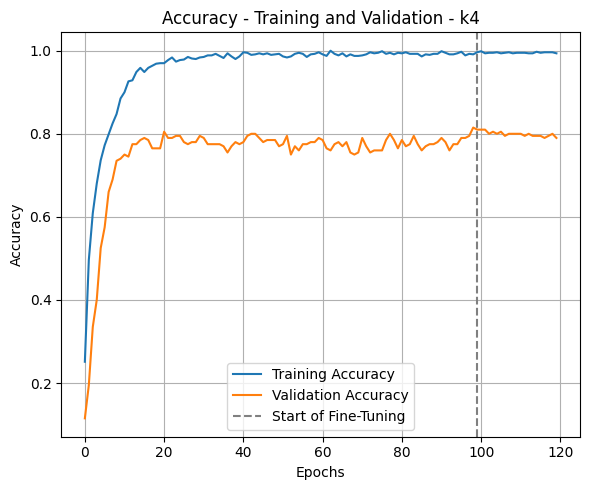

In [20]:
acc_phase1 = history.history['accuracy']
val_acc_phase1 = history.history['val_accuracy']

acc_phase2 = history_finetune.history['accuracy']
val_acc_phase2 = history_finetune.history['val_accuracy']

acc_total = acc_phase1 + acc_phase2
val_acc_total = val_acc_phase1 + val_acc_phase2
epochs_total = range(len(acc_total))

plt.figure(figsize=(6,5))
plt.plot(epochs_total, acc_total, label='Training Accuracy')
plt.plot(epochs_total, val_acc_total, label='Validation Accuracy')

# Mark the transition between phases
plt.axvline(x=len(acc_phase1)-1, color='gray', linestyle='--', label='Start of Fine-Tuning')

plt.title('Accuracy - Training and Validation - k4')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Musical Genre Classification/Resultados/efficientnetb0_genre_scal_mel_kfold/accuracy_genre_mel_k4.pdf')
plt.show()

In [21]:
np.save('/content/drive/MyDrive/Musical Genre Classification/Resultados/efficientnetb0_genre_scal_mel_kfold/acc_total_k4.npy', acc_total)
np.save('/content/drive/MyDrive/Musical Genre Classification/Resultados/efficientnetb0_genre_scal_mel_kfold/val_acc_total_k4.npy', val_acc_total)

In [22]:
model.save('/content/drive/MyDrive/Musical Genre Classification/Resultados/efficientnetb0_genre_scal_mel_kfold/model_k4.keras')

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/Musical Genre Classification/Resultados/efficientnetb0_genre_scal_mel_kfold/model_k4.keras')

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 112 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [23]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

testDS_eval = validationDS.unbatch().batch(32)  # ou validationDS

y_true = []
y_pred = []

for images, labels in testDS_eval:
    preds = model.predict(images)
    y_pred.extend(np.argmax(preds, axis=1))
    y_true.extend(labels.numpy())

cm = confusion_matrix(y_true, y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


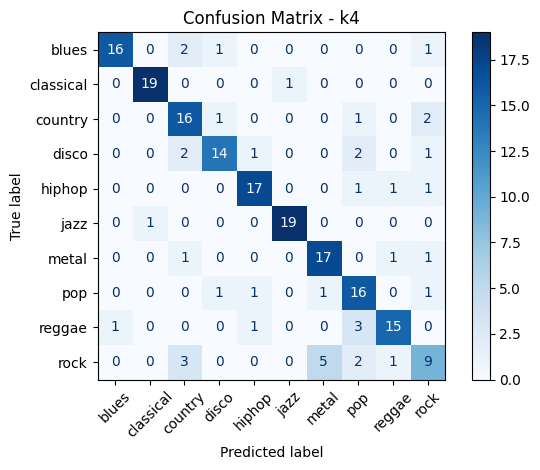

In [24]:
# Supondo que você tem class_names do seu dataset
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix - k4")
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Musical Genre Classification/Resultados/efficientnetb0_genre_scal_mel_kfold/confusionmatrix_genre_mel_k4.pdf')
plt.show()

In [25]:
from google.colab import runtime
runtime.unassign()

# k=5

In [4]:
import zipfile

zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Musical Genre Classification/Database/genre_scal_mel_kfold/treinamento5.zip", 'r')
zip_ref.extractall("/content")
zip_ref.close()

### Tensors Definitions

In [5]:
TRAIN_DATASET = os.path.join("/content", "training5")
VAL_DATASET = os.path.join("/content", "validation5")
#TEST_DATASET = os.path.join("/content", "teste1")
#METRONOMOS_DATASET = os.path.join("/content/drive/MyDrive/Database", "metronomos_review")

classes = os.listdir(VAL_DATASET) #10 classes
classes = sorted(classes)


def make_dataset(path, batch_size):
    def parse_image(filename):
        image = tf.io.read_file(filename)
        image = tf.image.decode_jpeg(image, channels=3)
        image = tf.image.resize(image, (300, 300))  # resize para modelos pré-treinados
        image = preprocess_input(image)  # 👈 importante
        return image

    def configure_for_performance(ds):
        ds = ds.shuffle(buffer_size=1000)
        ds = ds.batch(batch_size)
        ds = ds.repeat()
        ds = ds.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
        return ds

    class_names = sorted(os.listdir(path))  # Agora local
    filenames = glob(path + '/*/*')
    random.shuffle(filenames)
    labels = [class_names.index(name.split('/')[-2]) for name in filenames]

    filenames_ds = tf.data.Dataset.from_tensor_slices(filenames)
    images_ds = filenames_ds.map(parse_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    labels_ds = tf.data.Dataset.from_tensor_slices(labels)
    ds = tf.data.Dataset.zip((images_ds, labels_ds))
    ds = configure_for_performance(ds)

    return ds, class_names, images_ds, labels_ds

In [6]:
def make_dataset_predict(path, batch_size):
    def parse_image(filename):
        image = tf.io.read_file(filename)
        image = tf.image.decode_jpeg(image, channels=3)
        image = tf.image.resize(image, (300, 300))  # resize para modelos pré-treinados
        image = preprocess_input(image)  # 👈 importante
        return image

    def configure_for_performance(ds):
        #ds = ds.shuffle(buffer_size=1000)
        ds = ds.batch(batch_size)
        #ds = ds.repeat()
        ds = ds.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
        return ds

    class_names = sorted(os.listdir(path))  # Agora local
    filenames = glob(path + '/*/*')
    random.shuffle(filenames)
    labels = [class_names.index(name.split('/')[-2]) for name in filenames]

    filenames_ds = tf.data.Dataset.from_tensor_slices(filenames)
    images_ds = filenames_ds.map(parse_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    labels_ds = tf.data.Dataset.from_tensor_slices(labels)
    ds = tf.data.Dataset.zip((images_ds, labels_ds))
    ds = configure_for_performance(ds)

    return ds, class_names, images_ds, labels_ds

In [7]:
trainDS, classes_t, images_train, labels_train = make_dataset(TRAIN_DATASET, BS) #labels com valores 0 a 234
validationDS, classes_v, images_validation, labels_validation = make_dataset_predict(VAL_DATASET, BS) #labels com valores 0 a 234
#testDS, classes_te, images_test, labels_test = make_dataset(TEST_DATASET, BS)
print(trainDS)
print(validationDS)
#print(testDS)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [8]:
def make_dataset_augmentation(path, batch_size):
    def parse_image_with_stretch_tf(filename, label):
        image = tf.io.read_file(filename)
        image = tf.image.decode_jpeg(image, channels=3)

        # Stretch horizontal
        stretch_factors = tf.constant([1, 1.1, 1.2, 1.3], dtype=tf.float32)
        idx = tf.random.uniform([], minval=0, maxval=3, dtype=tf.int32)
        stretch = stretch_factors[idx]

        height = tf.shape(image)[0]
        width = tf.cast(tf.shape(image)[1], tf.float32)
        new_width = tf.cast(width * stretch, tf.int32)

        image = tf.image.resize(image, size=[height, new_width])
        image = tf.image.resize_with_crop_or_pad(image, 300, 300)
        image = preprocess_input(image)  # 👈 importante

        # Define forma estática para o grafo entender
        image.set_shape([300, 300, 3])
        return image, label

    def configure_for_performance(ds):
        ds = ds.shuffle(buffer_size=1000)
        ds = ds.batch(batch_size)
        ds = ds.repeat()
        ds = ds.prefetch(tf.data.AUTOTUNE)
        return ds

    # Carrega nomes e rótulos
    class_names = sorted(os.listdir(path))
    filenames = glob(path + '/*/*')
    random.shuffle(filenames)
    labels = [class_names.index(name.split('/')[-2]) for name in filenames]

    filenames_ds = tf.data.Dataset.from_tensor_slices(filenames)
    labels_ds = tf.data.Dataset.from_tensor_slices(labels)

    # Unifica imagens e rótulos ANTES do map
    ds = tf.data.Dataset.zip((filenames_ds, labels_ds))
    ds = ds.map(parse_image_with_stretch_tf, num_parallel_calls=tf.data.AUTOTUNE)
    ds = configure_for_performance(ds)

    return ds, class_names

In [9]:
trainDS_aug, classes_t_aug = make_dataset_augmentation(TRAIN_DATASET, BS) #labels com valores 0 a 234
print(trainDS_aug)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [10]:
print(classes_t)
print(classes_t_aug)
print(classes)

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


In [11]:
list_images_train = list(images_train.as_numpy_iterator())

In [12]:
list_images_validation = list(images_validation.as_numpy_iterator())

In [ ]:
#list_images_train_aug = list(images_train_aug.as_numpy_iterator())

In [ ]:
#list_images_test = list(images_test.as_numpy_iterator())

In [13]:
list_labels_train = list(labels_train.as_numpy_iterator())
labels_train_true = []
for i in list_labels_train:
       labels_train_true.append(classes[i])
#labels_train_true = np.array(labels_train_true, int) #labels de 23 a 257

list_labels_validation = list(labels_validation.as_numpy_iterator())
labels_validation_true = []
for i in list_labels_validation:
       labels_validation_true.append(classes[i])
#labels_validation_true = np.array(labels_validation_true, int)  #labels de 23 a 257

#list_labels_test= list(labels_test.as_numpy_iterator())
#labels_test_true = []
#for i in list_labels_test:
#       labels_test_true.append(classes[i])
#labels_test_true = np.array(labels_test_true, int)  #labels de 23 a 257

In [14]:
images_train_ds = np.array(list_images_train)
print(images_train_ds.shape)
images_validation_ds = np.array(list_images_validation)
print(images_validation_ds.shape)
#images_test_ds = np.array(list_images_test)
print(len(labels_train_true))
print(len(labels_validation_true))
#print(labels_test_true.shape)
print(trainDS_aug)
print(trainDS)
print(validationDS)
#print(testDS)

(800, 300, 300, 3)
(200, 300, 300, 3)
800
200
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [15]:
print(images_train_ds[1].shape)

(300, 300, 3)


In [ ]:
#print(list_images_train_aug[1].shape)

In [16]:
num_images_predict = len(glob(TRAIN_DATASET + '/*/*'))
num_images_val = len(glob(VAL_DATASET + '/*/*'))
steps_per_epoch_predict =math.ceil(num_images_predict/BS)
validation_steps = math.ceil(num_images_val/BS)

#Criando o multilabel binarizer:

mlb = MultiLabelBinarizer()
dicionario = mlb.fit_transform([classes])

In [17]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)
opt = keras.optimizers.Adam(learning_rate=lr_schedule)
optimizer = keras.optimizers.Adam(learning_rate=1e-4)


base_model.trainable = True
for layer in base_model.layers[:-80]:
    layer.trainable = False

model.compile(loss ='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

### Model.fit

In [18]:
%%time
history = model.fit(trainDS_aug, validation_data=validationDS, epochs=100, batch_size=BS, steps_per_epoch=steps_per_epoch_predict,  validation_steps=validation_steps ,verbose=1)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 53s 534ms/step - accuracy: 0.1661 - loss: 2.2665 - val_accuracy: 0.1300 - val_loss: 2.2664
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.4295 - loss: 1.8765 - val_accuracy: 0.2200 - val_loss: 2.1252
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.5978 - loss: 1.4779 - val_accuracy: 0.3650 - val_loss: 1.9402
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.6319 - loss: 1.2556 - val_accuracy: 0.4900 - val_loss: 1.6732
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.7028 - loss: 1.0041 - val_accuracy: 0.5500 - val_loss: 1.4252
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.7477 - loss: 0.8556 - val_accuracy: 0.5700 - val_loss: 1.2202
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.7933 - loss: 0.7118 - val_accuracy: 0.6300 - val_loss: 1.0500
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.8191 - loss: 0.6030 - val_acc

In [19]:



# Fase 2: Fine-tuning (descongelar parte da base)
base_model.trainable = True

# Congela camadas iniciais e libera só as últimas 20, por exemplo:
#for layer in base_model.layers[:-50]:
#    layer.trainable = False

model.optimizer.learning_rate.assign(1e-5)

#keras.backend.set_value(model.optimizer.learning_rate, 1e-5)

#from tensorflow.keras.optimizers import Adam

#model.compile(optimizer=Adam(1e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Compila com taxa de aprendizado reduzida
#model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_finetune = model.fit(trainDS_aug, validation_data=validationDS, epochs=20, batch_size=BS, steps_per_epoch=steps_per_epoch_predict,  validation_steps=validation_steps ,verbose=1)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.9964 - loss: 0.0139 - val_accuracy: 0.7750 - val_loss: 0.9903
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.9981 - loss: 0.0107 - val_accuracy: 0.7750 - val_loss: 0.9723
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.9917 - loss: 0.0202 - val_accuracy: 0.7850 - val_loss: 0.9683
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.9875 - loss: 0.0279 - val_accuracy: 0.7800 - val_loss: 0.9614
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.9991 - loss: 0.0075 - val_accuracy: 0.7850 - val_loss: 0.9568
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.9940 - loss: 0.0252 - val_accuracy: 0.7900 - val_loss: 0.9582
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.9933 - loss: 0.0193 - val_accuracy: 0.7900 - val_loss: 0.9514
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.9977 - loss: 0.0116 - val_accuracy: 0.

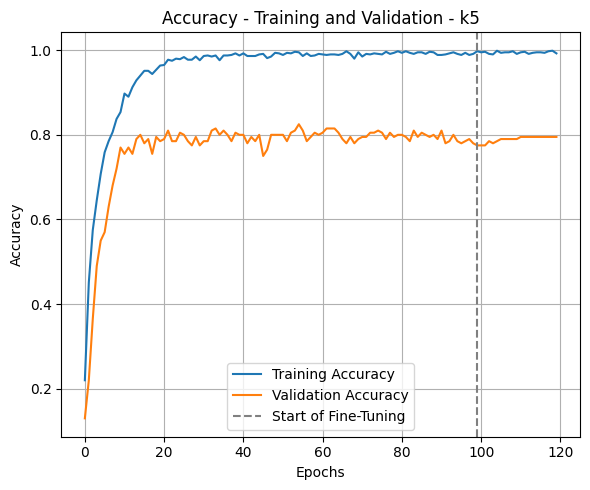

In [20]:
acc_phase1 = history.history['accuracy']
val_acc_phase1 = history.history['val_accuracy']

acc_phase2 = history_finetune.history['accuracy']
val_acc_phase2 = history_finetune.history['val_accuracy']

acc_total = acc_phase1 + acc_phase2
val_acc_total = val_acc_phase1 + val_acc_phase2
epochs_total = range(len(acc_total))

plt.figure(figsize=(6,5))
plt.plot(epochs_total, acc_total, label='Training Accuracy')
plt.plot(epochs_total, val_acc_total, label='Validation Accuracy')

# Mark the transition between phases
plt.axvline(x=len(acc_phase1)-1, color='gray', linestyle='--', label='Start of Fine-Tuning')

plt.title('Accuracy - Training and Validation - k5')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Musical Genre Classification/Resultados/efficientnetb0_genre_scal_mel_kfold/accuracy_genre_mel_k5.pdf')
plt.show()

In [21]:
np.save('/content/drive/MyDrive/Musical Genre Classification/Resultados/efficientnetb0_genre_scal_mel_kfold/acc_total_k5.npy', acc_total)
np.save('/content/drive/MyDrive/Musical Genre Classification/Resultados/efficientnetb0_genre_scal_mel_kfold/val_acc_total_k5.npy', val_acc_total)

In [22]:
model.save('/content/drive/MyDrive/Musical Genre Classification/Resultados/efficientnetb0_genre_scal_mel_kfold/model_k5.keras')

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/Musical Genre Classification/Resultados/efficientnetb0_genre_scal_mel_kfold/model_k5.keras')

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 112 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [23]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

testDS_eval = validationDS.unbatch().batch(32)  # ou validationDS

y_true = []
y_pred = []

for images, labels in testDS_eval:
    preds = model.predict(images)
    y_pred.extend(np.argmax(preds, axis=1))
    y_true.extend(labels.numpy())

cm = confusion_matrix(y_true, y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


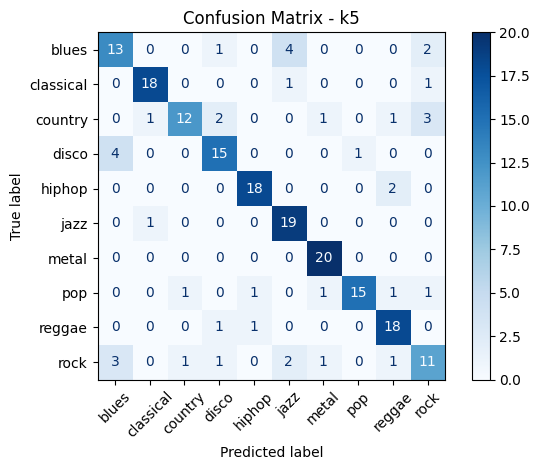

In [24]:
# Supondo que você tem class_names do seu dataset
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix - k5")
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Musical Genre Classification/Resultados/efficientnetb0_genre_scal_mel_kfold/confusionmatrix_genre_mel_k5.pdf')
plt.show()

In [27]:
from google.colab import runtime
runtime.unassign()

# Geração de Tabela

In [25]:
import numpy as np
import pandas as pd
import os

# Diretório base onde os arquivos estão salvos
base_path = "/content/drive/MyDrive/Musical Genre Classification/Resultados/efficientnetb0_genre_scal_mel_kfold"

# Inicializa dicionários para os resultados
final_train_acc = {}
max_train_acc = {}
final_val_acc = {}
max_val_acc = {}

# Loop para k = 1 até 5
for k in range(1, 6):
    acc_path = os.path.join(base_path, f"acc_total_k{k}.npy")
    val_acc_path = os.path.join(base_path, f"val_acc_total_k{k}.npy")

    acc = np.load(acc_path)
    val_acc = np.load(val_acc_path)

    final_train_acc[f'k{k}'] = acc[-1]
    max_train_acc[f'k{k}'] = np.max(acc)
    final_val_acc[f'k{k}'] = val_acc[-1]
    max_val_acc[f'k{k}'] = np.max(val_acc)

# Calcula a média e desvio padrão para cada linha
def add_resultado_final_std(row):
    valores = np.array([v for v in row.values()])
    return np.mean(valores), np.std(valores)

# Construindo DataFrame
df = pd.DataFrame({
    "Acurácia Final - Treinamento": final_train_acc,
    "Valor Máximo Acurácia - Treinamento": max_train_acc,
    "Acurácia Final - Validação": final_val_acc,
    "Valor Máximo Acurácia - Validação": max_val_acc
}).T

# Adiciona colunas de média e desvio padrão
df["Resultado Final"] = df.mean(axis=1)
df["Desvio Padrão"] = df.std(axis=1)

In [26]:
df

,k1,k2,k3,k4,k5,Resultado Final,Desvio Padrão
Acurácia Final - Treinamento,0.99875,0.99625,0.99875,0.99375,0.99250,0.99600,0.002549
Valor Máximo Acurácia - Treinamento,0.99875,1.00000,0.99875,1.00000,0.99875,0.99925,0.000612
Acurácia Final - Validação,0.77000,0.80000,0.83000,0.79000,0.79500,0.79700,0.019391
Valor Máximo Acurácia - Validação,0.79000,0.81000,0.83500,0.81500,0.82500,0.81500,0.015166
